In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
seed = 58840765
np.random.seed(seed)

In [3]:
data = pd.read_csv('L8_Catalog_Data.csv')

In [4]:
for column in data.columns:
    if data[column].dtype == 'object':
        try:
            data[column] = pd.to_numeric(data[column])
            print(f"Converted {column} to numeric")
        except:
            print(f"Could not convert {column} to numeric, might be a categorical variable")

In [5]:
# distribution

In [6]:
# Calculate and display percent distribution for all columns except 'customer_no' and 'buytabw'
excluded_columns = ['customer_no', 'buytabw']
distribution_columns = [col for col in data.columns if col not in excluded_columns]

print("\nPercentage Distribution:")
for column in distribution_columns:
    if column in data.columns:
        value_counts = data[column].value_counts(normalize=True) * 100
        print(f"\n{column} Distribution:")
        print(value_counts)




Percentage Distribution:

tabordrs Distribution:
tabordrs
1     14.287099
0     12.997528
2     12.672711
3     11.077714
4      9.788142
5      7.708343
6      6.229699
7      4.964367
8      4.295341
9      3.126970
10     2.496728
11     2.065254
12     1.716197
13     1.212004
14     1.115043
15     0.765986
16     0.591458
17     0.450865
18     0.421777
19     0.339361
20     0.295729
22     0.247249
21     0.223009
24     0.121200
26     0.111504
23     0.106656
27     0.082416
25     0.077568
29     0.053328
33     0.048480
28     0.038784
30     0.038784
32     0.024240
34     0.019392
38     0.019392
36     0.019392
31     0.014544
43     0.014544
35     0.014544
42     0.014544
50     0.014544
41     0.009696
40     0.009696
37     0.009696
47     0.004848
52     0.004848
55     0.004848
51     0.004848
48     0.004848
56     0.004848
72     0.004848
67     0.004848
58     0.004848
39     0.004848
Name: proportion, dtype: float64

divsords Distribution:
divsords
0     48.77

In [7]:
# Display the first few rows of the DataFrame to verify changes
print("\nFirst few rows of the DataFrame:")
print(data.head())

# Display information about the DataFrame
print("\nDataFrame Information:")
print(data.info())


First few rows of the DataFrame:
   customer_no  buytabw  tabordrs  divsords  divwords  spgtabord  moslsdvs  \
0            1        0         7         0         0          2   42.0000   
1            2        0         6         0         4          5   42.0000   
2            3        0         1         0         3          0   42.0000   
3            4        0         9         1         9          5   22.0105   
4            5        0         2         0         2          1   42.0000   

   moslsdvw  moslstab  orders  
0   42.0000    1.0184      10  
1   29.5335    5.5519       9  
2    0.7884    0.7884       3  
3    4.0736    0.3285      14  
4    1.4126   12.4836       7  

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20627 entries, 0 to 20626
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_no  20627 non-null  int64  
 1   buytabw      20627 non-null  int64  
 2  

In [8]:
import matplotlib.pyplot as plt
distribution_columns = [col for col in data.columns if col not in excluded_columns]

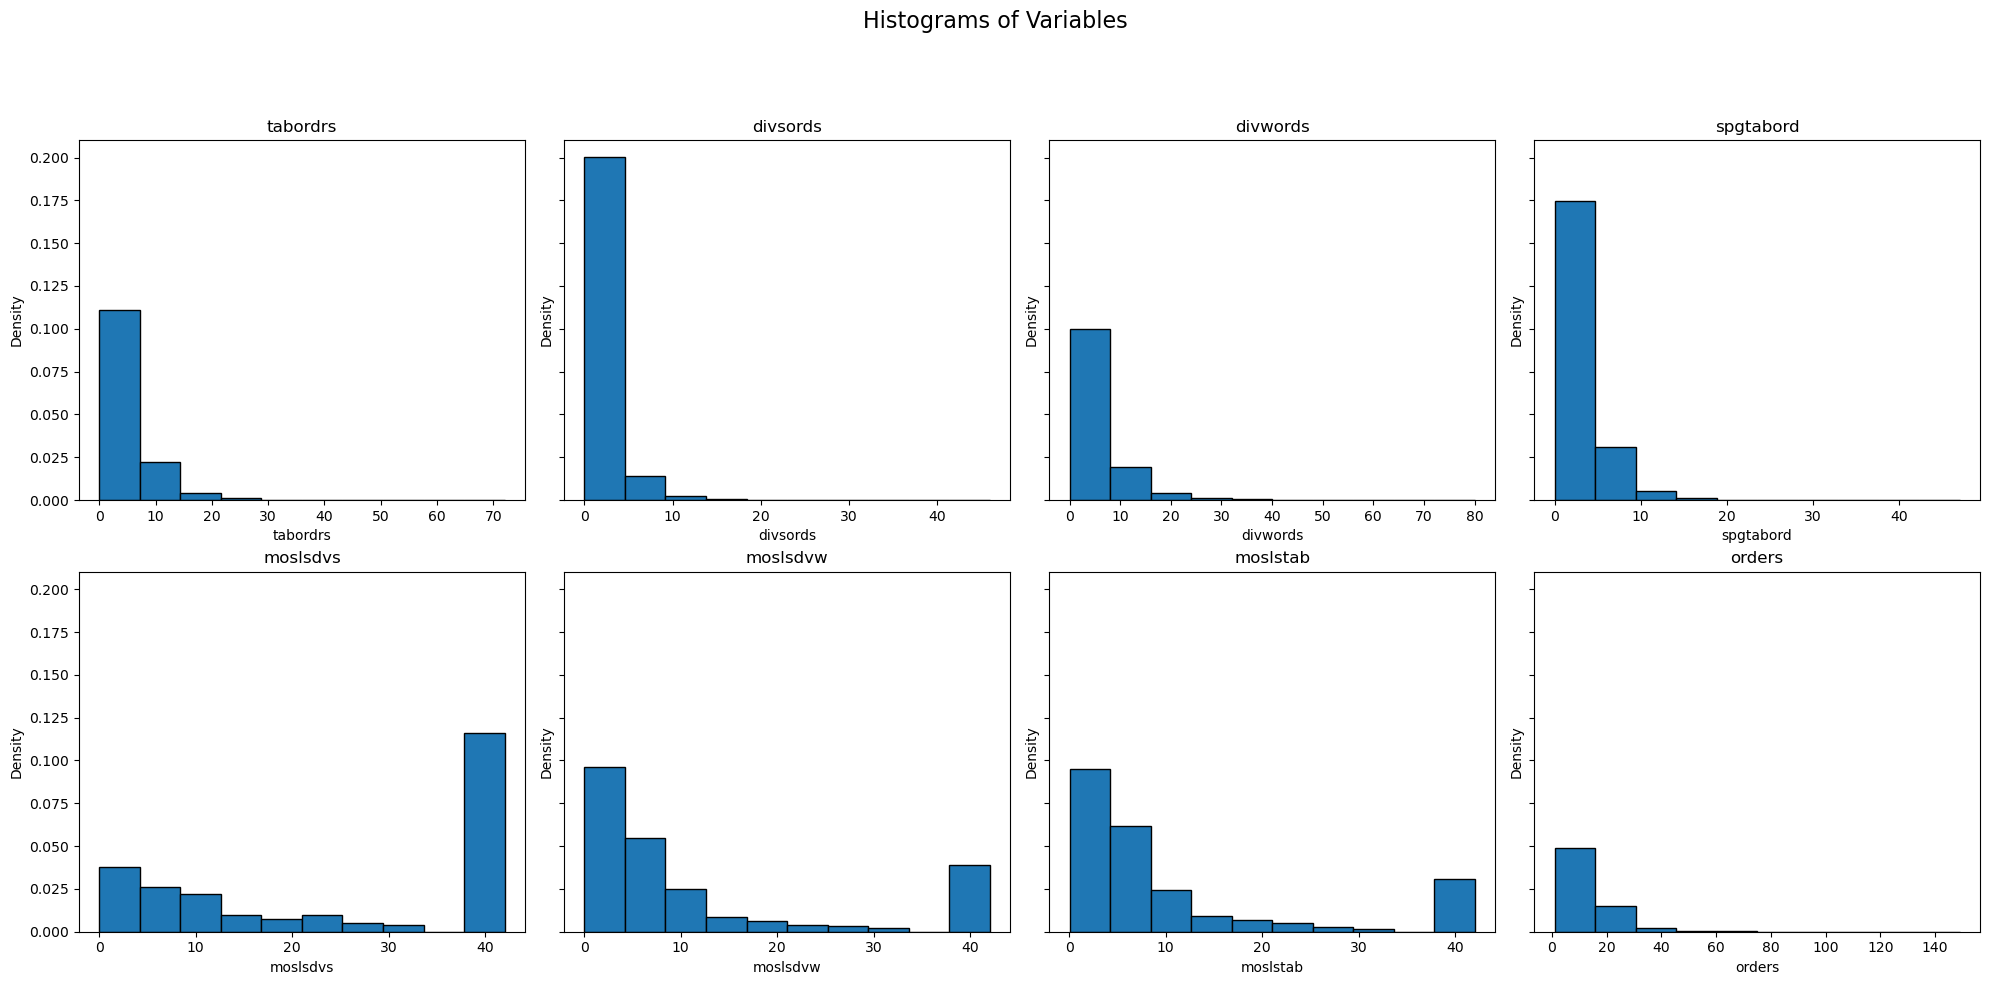

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Define columns to plot (exclude 'customer_no' and 'buytabw')
excluded_columns = ['customer_no', 'buytabw']
distribution_columns = [col for col in data.columns if col not in excluded_columns]

# Calculate the number of rows and columns for the subplot grid
n_cols = 4  # 
n_rows = 2  # 

# Create a figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows), sharey=True)
fig.suptitle("Histograms of Variables", fontsize=16)

# Flatten axes array for easier iteration (in case of multiple rows)
axes = np.array(axes).flatten()

# Plot histogram for each column
for idx, column in enumerate(distribution_columns):
    axes[idx].hist(data[column], bins=10, edgecolor='black', density=True)
    axes[idx].set_title(f"{column}")
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel("Density")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust top to make room for the main title
plt.show()

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume seed is already defined (if not, define it)
seed = 58840765

# Split the data into training (50%) and validation (50%) samples (provided code)
data_train, data_valid = train_test_split(data, test_size=0.5, random_state=seed)

# Reset indices for both dataframes (provided code)
data_train = data_train.reset_index(drop=True)
data_valid = data_valid.reset_index(drop=True)

# Step 1: Split into X and Y for logistic regression
# Define feature columns (exclude 'customer_no' and target variable 'buytabw')
feature_columns = [col for col in data_train.columns if col not in ['customer_no', 'buytabw']]

# Training set: X and Y
X_train = data_train[feature_columns]
Y_train = data_train['buytabw']

# Validation set: X and Y
X_valid = data_valid[feature_columns]
Y_valid = data_valid['buytabw']



# find important variable()

In [11]:
from scipy.stats import ttest_ind

# 2. Two-tailed t-tests
print("\nTwo-tailed t-tests with 'buytabw':")
print("-" * 70)

# Use columns from data_train as continuous variables
continuous_vars = ['tabordrs', 'divsords', 'divwords', 'spgtabord', 'moslsdvs', 'moslsdvw', 'moslstab', 'orders']

for var in continuous_vars:
    if var in data_train.columns and 'buytabw' in data_train.columns:

        
        # Check if buytabw has two groups
        if len(data_train['buytabw'].unique()) == 2:
            # Split data into two groups based on 'buytabw'
            group1 = data_train[data_train['buytabw'] == data_train['buytabw'].unique()[0]][var]
            group2 = data_train[data_train['buytabw'] == data_train['buytabw'].unique()[1]][var]

            # Perform t-test
            t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Using Welch's t-test (unequal variances)

            # Print results
            print(f"Variable: {var}")
            print(f"t-statistic: {t_stat:.4f}")
            print(f"p-value: {p_value:.4f}")

            # Group statistics
            print(f"Group 0 (buytabw={data_train['buytabw'].unique()[0]}): mean = {group1.mean():.4f}, std = {group1.std():.4f}, n = {len(group1)}")
            print(f"Group 1 (buytabw={data_train['buytabw'].unique()[1]}): mean = {group2.mean():.4f}, std = {group2.std():.4f}, n = {len(group2)}")

            # Interpret results
            alpha = 0.05
            if p_value < alpha:
                print(f"Result: There is a significant difference in '{var}' between the two buytabw groups (reject H0)")
            else:
                print(f"Result: There is no significant difference in '{var}' between the two buytabw groups (fail to reject H0)")
            print("-" * 70)
        else:
            print(f"The 'buytabw' variable does not have exactly two groups for t-test analysis")
    else:
        print(f"Variable '{var}' or 'buytabw' not found in the dataframe")


Two-tailed t-tests with 'buytabw':
----------------------------------------------------------------------
Variable: tabordrs
t-statistic: -25.6496
p-value: 0.0000
Group 0 (buytabw=0): mean = 3.9709, std = 3.9594, n = 8514
Group 1 (buytabw=1): mean = 8.1506, std = 6.6678, n = 1799
Result: There is a significant difference in 'tabordrs' between the two buytabw groups (reject H0)
----------------------------------------------------------------------
Variable: divsords
t-statistic: -14.1051
p-value: 0.0000
Group 0 (buytabw=0): mean = 1.2066, std = 1.9697, n = 8514
Group 1 (buytabw=1): mean = 2.3118, std = 3.1978, n = 1799
Result: There is a significant difference in 'divsords' between the two buytabw groups (reject H0)
----------------------------------------------------------------------
Variable: divwords
t-statistic: -27.1490
p-value: 0.0000
Group 0 (buytabw=0): mean = 3.7109, std = 4.2286, n = 8514
Group 1 (buytabw=1): mean = 8.9772, std = 7.9945, n = 1799
Result: There is a significa

# logistic for scaled data

In [12]:
X_log_train = X_train.copy()
Y_log_train = Y_train.copy()
X_log_valid = X_valid.copy()
Y_log_valid = Y_valid.copy()

In [13]:
X_log_valid

,tabordrs,divsords,divwords,spgtabord,moslsdvs,moslsdvw,moslstab,orders
0,2,1,0,1,13.0092,42.0000,19.6124,6
1,6,1,9,3,10.9067,2.5624,2.8581,13
2,20,4,19,13,15.5388,3.7451,3.7451,27
3,6,0,2,1,42.0000,0.7884,4.0079,16
4,11,1,5,8,10.6767,3.2523,2.4639,17
...,...,...,...,...,...,...,...,...
10309,5,2,0,5,4.4350,42.0000,4.4350,14
10310,3,3,3,3,8.8371,12.3193,4.3364,11
10311,6,5,9,3,5.9461,2.5624,9.3955,20
10312,6,2,0,3,2.1025,42.0000,0.2957,9


In [14]:
# Step 2: Standardize the features
# Initialize StandardScaler
scaler = StandardScaler()

# Standardize training set features
X_log_scaled_train = scaler.fit_transform(X_log_train)
X_log_scaled_train = pd.DataFrame(X_log_scaled_train, columns=feature_columns, index=X_log_train.index)

# Standardize validation set features (using the scaler fitted on training data)
X_log_scaled_valid = scaler.transform(X_log_valid)
X_log_scaled_valid = pd.DataFrame(X_log_scaled_valid, columns=feature_columns, index=X_log_valid.index)

# Target variable Y does not need standardization, but assign for task requirement
Y_log_scaled_train = Y_log_train.copy()
Y_log_scaled_valid = Y_log_valid.copy()

# Print shapes to verify
print("X_log_train shape:", X_log_train.shape)
print("Y_log_train shape:", Y_log_train.shape)
print("X_log_valid shape:", X_log_valid.shape)
print("Y_log_valid shape:", Y_log_valid.shape)
print("\nX_log_scaled_train shape:", X_log_scaled_train.shape)
print("Y_log_scaled_train shape:", Y_log_scaled_train.shape)
print("X_log_scaled_valid shape:", X_log_scaled_valid.shape)
print("Y_log_scaled_valid shape:", Y_log_scaled_valid.shape)

X_log_train shape: (10313, 8)
Y_log_train shape: (10313,)
X_log_valid shape: (10314, 8)
Y_log_valid shape: (10314,)

X_log_scaled_train shape: (10313, 8)
Y_log_scaled_train shape: (10313,)
X_log_scaled_valid shape: (10314, 8)
Y_log_scaled_valid shape: (10314,)


In [15]:
import statsmodels.api as sm
import pickle
from sklearn.metrics import confusion_matrix, classification_report

# Define independent variables (exclude 'customer_no' and 'buytabw')
# Since X_log_scaled_train is already prepared, use its columns
X_columns = X_log_scaled_train.columns.tolist()

# Make sure we have the 'buytabw' column
if 'buytabw' not in Y_log_scaled_train.name:
    print("Error: 'buytabw' column not found in the target variable")
else:
    print("Running logistic regression model...")
    print("Independent variables:", X_columns)

    # Prepare the data (already standardized)
    X = X_log_scaled_train
    y = Y_log_scaled_train



    # Build the first logistic regression model
    try:
        model = sm.Logit(y, X)
        # Fit the model
        results = model.fit()

        # Display the results
        print("\nFirst Logistic Regression Model Results:")
        print(results.summary())

        # Identify variables that are not significant at 5% level
        pvalues = results.pvalues[results.pvalues > 0.05].index.tolist()
        not_significant = pvalues

        print("\nVariables not significant at 5% level:")
        for var in not_significant:
            print(f"- {var}")

        # Remove not significant variables (except the constant)
        significant_vars = [var for var in X_columns if var not in not_significant or var == 'const']
        print("\nKeeping these variables for the second model:")
        for var in significant_vars:
            print(f"- {var}")

        # Build the second logistic regression model with only significant variables
        X_significant_vars = X[significant_vars]
        model2 = sm.Logit(y, X_significant_vars)
        results2 = model2.fit()

        # Display the results of the second model
        print("\nSecond Logistic Regression Model Results (after removing non-significant variables):")
        print(results2.summary())

        # Save the parameters of the second model
        params = results2.params
        print("\nParameters of the second model:")
        print(params)

        # Save parameters to a file for later use
        with open('logistic_regression_params.pkl', 'wb') as file:
            pickle.dump(params, file)
    except:
        print("Error in model fitting")

Running logistic regression model...
Independent variables: ['tabordrs', 'divsords', 'divwords', 'spgtabord', 'moslsdvs', 'moslsdvw', 'moslstab', 'orders']
Optimization terminated successfully.
         Current function value: 0.635233
         Iterations 6

First Logistic Regression Model Results:
                           Logit Regression Results                           
Dep. Variable:                buytabw   No. Observations:                10313
Model:                          Logit   Df Residuals:                    10305
Method:                           MLE   Df Model:                            7
Date:                Mon, 14 Apr 2025   Pseudo R-squ.:                 -0.3724
Time:                        11:02:41   Log-Likelihood:                -6551.2
converged:                       True   LL-Null:                       -4773.4
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025  

Model parameters loaded successfully
Parameters: tabordrs     0.289398
divwords     0.629771
spgtabord    0.178552
moslsdvw    -0.107748
moslstab    -0.096859
orders      -0.346522
dtype: float64

Summary statistics of predicted probabilities (Logistic Regression):
count    10314.000000
mean         0.490715
std          0.165071
min          0.118884
25%          0.366214
50%          0.462110
75%          0.582150
max          0.999973
Name: log_pred_prob, dtype: float64


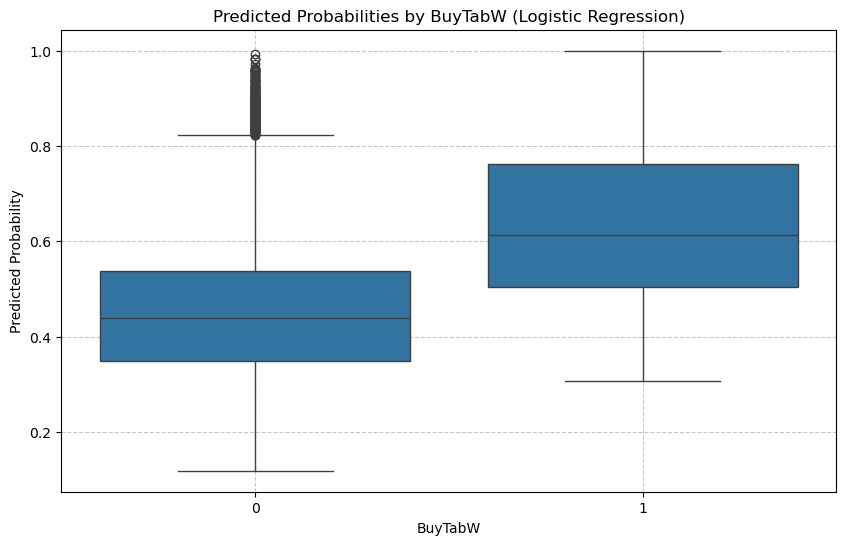


Classification Table (Confusion Matrix) - Logistic Regression:
                   Predicted: BuyTabW=0  Predicted: BuyTabW=1
Actual: BuyTabW=0                  5731                  2809
Actual: BuyTabW=1                   421                  1353

Total observations: 10314
Correct predictions: 7084
Misclassifications: 3230
Misclassification error: 31.32%

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.93      0.67      0.78      8540
           1       0.33      0.76      0.46      1774

    accuracy                           0.69     10314
   macro avg       0.63      0.72      0.62     10314
weighted avg       0.83      0.69      0.72     10314



In [16]:

# Create a new DataFrame to store prediction results
predictions = pd.DataFrame(index=data_valid.index)

# Load the parameters from the previous logistic regression model
try:
    with open('logistic_regression_params.pkl', 'rb') as file:
        params = pickle.load(file)
    print("Model parameters loaded successfully")
    print("Parameters:", params)
except FileNotFoundError:
    print("Error: Could not find the model parameters file 'logistic_regression_params.pkl'")
    params = None

if params is not None:
    # Get the column names from the parameters (excluding const)
    model_columns = [col for col in params.index if col != 'const']

    # Check if all required columns exist in the validation feature matrix
    missing_columns = [col for col in model_columns if col not in X_log_scaled_valid.columns]
    if missing_columns:
        print(f"WARNING: The following columns from the model are missing in the validation data: {missing_columns}")
        print("Please make sure the validation data has the same structure as the training data.")
    else:
        # Calculate the linear predictor (z), minimizing new variables
        z = np.zeros(len(X_log_scaled_valid))
        for col in model_columns:
            if col in X_log_scaled_valid.columns:
                z += params[col] * X_log_scaled_valid[col]

        # Calculate the predicted probability using the logistic function
        log_pred_prob = 1 / (1 + np.exp(-z))

        # Store predicted probabilities in the new DataFrame
        predictions['log_pred_prob'] = log_pred_prob

        print("\nSummary statistics of predicted probabilities (Logistic Regression):")
        print(predictions['log_pred_prob'].describe())

        # Generate side-by-side boxplot for pred_prob by buytabw
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data_valid['buytabw'], y=predictions['log_pred_prob'])
        plt.title('Predicted Probabilities by BuyTabW (Logistic Regression)')
        plt.xlabel('BuyTabW')
        plt.ylabel('Predicted Probability')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.savefig('log_pred_prob_boxplot.png')
        plt.show()

        # Create predicted buytabw variable based on 0.5 threshold
        predictions['log_pred_buytabw'] = (predictions['log_pred_prob'] > 0.5).astype(int)

        # Create classification table
        conf_matrix = confusion_matrix(data_valid['buytabw'], predictions['log_pred_buytabw'])

        # Calculate misclassification error and percent
        total_observations = len(data_valid)
        correct_predictions = conf_matrix[0, 0] + conf_matrix[1, 1]
        misclassifications = total_observations - correct_predictions
        misclassification_rate = misclassifications / total_observations * 100

        print("\nClassification Table (Confusion Matrix) - Logistic Regression:")
        print(pd.DataFrame(
            conf_matrix,
            index=['Actual: BuyTabW=0', 'Actual: BuyTabW=1'],
            columns=['Predicted: BuyTabW=0', 'Predicted: BuyTabW=1']
        ))

        print(f"\nTotal observations: {total_observations}")
        print(f"Correct predictions: {correct_predictions}")
        print(f"Misclassifications: {misclassifications}")
        print(f"Misclassification error: {misclassification_rate:.2f}%")

        # Store the misclassification rate for later comparison
        log_misclassification_rate = misclassification_rate

        # Print additional classification metrics
        print("\nClassification Report (Logistic Regression):")
        print(classification_report(data_valid['buytabw'], predictions['log_pred_buytabw']))

# Random Forest

In [17]:
# Copy the original datasets
X_forest_train = X_train.copy()
Y_forest_train = Y_train.copy()
X_forest_valid = X_valid.copy()
Y_forest_valid = Y_valid.copy()


In [18]:
X_valid

,tabordrs,divsords,divwords,spgtabord,moslsdvs,moslsdvw,moslstab,orders
0,2,1,0,1,13.0092,42.0000,19.6124,6
1,6,1,9,3,10.9067,2.5624,2.8581,13
2,20,4,19,13,15.5388,3.7451,3.7451,27
3,6,0,2,1,42.0000,0.7884,4.0079,16
4,11,1,5,8,10.6767,3.2523,2.4639,17
...,...,...,...,...,...,...,...,...
10309,5,2,0,5,4.4350,42.0000,4.4350,14
10310,3,3,3,3,8.8371,12.3193,4.3364,11
10311,6,5,9,3,5.9461,2.5624,9.3955,20
10312,6,2,0,3,2.1025,42.0000,0.2957,9


In [19]:
# Step 1: Train Random Forest model on the training data
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=58840765)
# Fit the model on the training data (non-standardized)
rf_model.fit(X_forest_train, Y_forest_train)

RandomForestClassifier(random_state=58840765)

In [20]:
rf_prob = rf_model.predict_proba(X_forest_valid)[:, 1]

# Restrict predicted probabilities to [0, 1]
rf_prob = np.clip(rf_prob, 0, 1)

# Store predicted probabilities in the predictions DataFrame
predictions['rf_pred_prob'] = rf_prob

# Classify based on 0.5 threshold
predictions['rf_pred_buytabw'] = (predictions['rf_pred_prob'] > 0.5).astype(int)

In [21]:
# Step 4: Evaluate Random Forest
# Create confusion matrix
rf_conf_matrix = confusion_matrix(data_valid['buytabw'], predictions['rf_pred_buytabw'])

# Calculate misclassification error and percent
rf_total_observations = len(data_valid)
rf_correct_predictions = rf_conf_matrix[0, 0] + rf_conf_matrix[1, 1]
rf_misclassifications = rf_total_observations - rf_correct_predictions
rf_misclassification_rate = rf_misclassifications / rf_total_observations * 100

print("\nRandom Forest Confusion Matrix:")
print(pd.DataFrame(
    rf_conf_matrix,
    index=['Actual: BuyTabW=0', 'Actual: BuyTabW=1'],
    columns=['Predicted: BuyTabW=0', 'Predicted: BuyTabW=1']
))

print(f"\nRandom Forest Total observations: {rf_total_observations}")
print(f"Random Forest Correct predictions: {rf_correct_predictions}")
print(f"Random Forest Misclassifications: {rf_misclassifications}")
print(f"Random Forest Misclassification error: {rf_misclassification_rate:.2f}%")

# Print classification report
print("\nRandom Forest Classification Report:")
print(classification_report(data_valid['buytabw'], predictions['rf_pred_buytabw']))


Random Forest Confusion Matrix:
                   Predicted: BuyTabW=0  Predicted: BuyTabW=1
Actual: BuyTabW=0                  8282                   258
Actual: BuyTabW=1                  1463                   311

Random Forest Total observations: 10314
Random Forest Correct predictions: 8593
Random Forest Misclassifications: 1721
Random Forest Misclassification error: 16.69%

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      8540
           1       0.55      0.18      0.27      1774

    accuracy                           0.83     10314
   macro avg       0.70      0.57      0.59     10314
weighted avg       0.80      0.83      0.80     10314



In [22]:
#Compare with logistics
print("\nComparison of Misclassification Rates:")
print(f"Logistic Regression Misclassification Rate: {log_misclassification_rate:.2f}%")
print(f"Random Forest Misclassification Rate: {rf_misclassification_rate:.2f}%")


Comparison of Misclassification Rates:
Logistic Regression Misclassification Rate: 31.32%
Random Forest Misclassification Rate: 16.69%


## boxplot of prediction of Random Forest

In [23]:
# Step 1: Create a copy of data_valid to store prediction results
data_valid_copy = data_valid.copy()

# Step 2: Extract important features from the random forest model
# RandomForestClassifier provides feature importances
feature_importances = rf_model.feature_importances_
feature_names = X_forest_train.columns
important_features = [feature_names[i] for i in range(len(feature_names)) if feature_importances[i] > 0]
print(f"Loaded random forest model with {len(important_features)} important features")
print("Important features:", important_features)

Loaded random forest model with 8 important features
Important features: ['tabordrs', 'divsords', 'divwords', 'spgtabord', 'moslsdvs', 'moslsdvw', 'moslstab', 'orders']


In [24]:
# Step 3: Extract the features from the validation data
# Ensure we only use validation data (X_forest_valid)
X_valid = X_forest_valid[important_features]

# Step 4: Predict probabilities
# The second column is for class 1 (buytabw=1)
pred_probs = rf_model.predict_proba(X_valid)
pred_prob = pred_probs[:, 1]

# Store predicted probabilities in the copied DataFrame
data_valid_copy['rf_pred_prob'] = pred_prob

In [25]:
# Step 5: Classify using a threshold of 0.5
# Explanation: We use 0.5 as the threshold because it is the default for binary classification,
# balancing the trade-off between sensitivity and specificity. This threshold assumes equal cost
# for false positives and false negatives, which is reasonable for an initial analysis.
data_valid_copy['rf_pred_buytabw'] = (data_valid_copy['rf_pred_prob'] > 0.5).astype(int)

# Step 6: Verify the predicted purchase probability variable
print("\nSummary statistics of predicted probabilities (Random Forest):")
print(data_valid_copy['rf_pred_prob'].describe())
# Check if values are reasonable (should be between 0 and 1)
if (data_valid_copy['rf_pred_prob'] >= 0).all() and (data_valid_copy['rf_pred_prob'] <= 1).all():
    print("Predicted probabilities are within the valid range [0, 1].")
else:
    print("WARNING: Predicted probabilities contain values outside [0, 1].")


Summary statistics of predicted probabilities (Random Forest):
count    10314.000000
mean         0.181145
std          0.177559
min          0.000000
25%          0.010000
50%          0.150000
75%          0.280000
max          0.980000
Name: rf_pred_prob, dtype: float64
Predicted probabilities are within the valid range [0, 1].


<Figure size 1000x600 with 0 Axes>

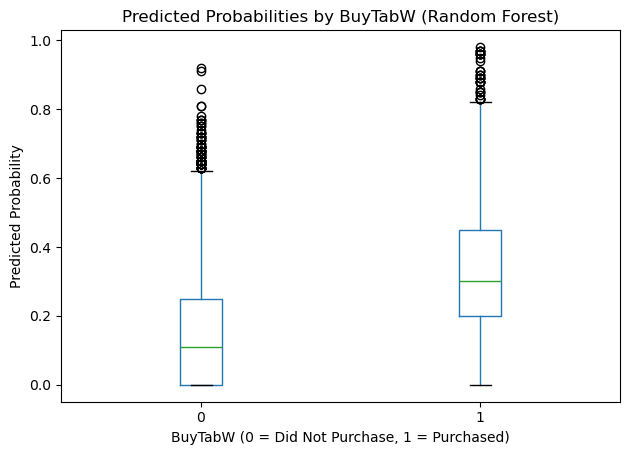

In [26]:
# Step 7: Generate box plots using pandas' boxplot
plt.figure(figsize=(10, 6))
data_valid_copy.boxplot(column='rf_pred_prob', by='buytabw', grid=False)
plt.title('Predicted Probabilities by BuyTabW (Random Forest)')
plt.suptitle('')  # Remove the default suptitle
plt.xlabel('BuyTabW (0 = Did Not Purchase, 1 = Purchased)')
plt.ylabel('Predicted Probability')
plt.tight_layout()
plt.savefig('rf_pred_prob_boxplot.png')
plt.show()

In [27]:
# Step 8: Create a misclassification summary
# Confusion matrix
conf_matrix = confusion_matrix(data_valid_copy['buytabw'], data_valid_copy['rf_pred_buytabw'])
print("\nClassification Table (Confusion Matrix) - Random Forest:")
print(pd.DataFrame(
    conf_matrix,
    index=['Actual: Did Not Purchase (0)', 'Actual: Purchased (1)'],
    columns=['Predicted: Did Not Purchase (0)', 'Predicted: Purchased (1)']
))

# Calculate misclassification error and percent
total_observations = conf_matrix.sum()
correct_predictions = np.diag(conf_matrix).sum()
misclassifications = total_observations - correct_predictions
misclassification_rate = (misclassifications / total_observations) * 100

print("\nTotal observations:", total_observations)
print("Correctly classified:", correct_predictions)
print("Misclassified:", misclassifications)
print("Misclassification error rate:", round(misclassification_rate, 2), "%")

# Detailed classification report
print("\nDetailed Classification Report (Random Forest):")
print(classification_report(data_valid_copy['buytabw'], data_valid_copy['rf_pred_buytabw']))

# Calculate specific metrics
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]
true_negatives = conf_matrix[0, 0]
false_negatives = conf_matrix[1, 0]
sensitivity = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
specificity = true_negatives / (true_negatives + false_positives) if (true_negatives + false_positives) > 0 else 0

print("\nSensitivity (True Positive Rate):", round(sensitivity, 4))
print("Specificity (True Negative Rate):", round(specificity, 4))


Classification Table (Confusion Matrix) - Random Forest:
                              Predicted: Did Not Purchase (0)  \
Actual: Did Not Purchase (0)                             8282   
Actual: Purchased (1)                                    1463   

                              Predicted: Purchased (1)  
Actual: Did Not Purchase (0)                       258  
Actual: Purchased (1)                              311  

Total observations: 10314
Correctly classified: 8593
Misclassified: 1721
Misclassification error rate: 16.69 %

Detailed Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      8540
           1       0.55      0.18      0.27      1774

    accuracy                           0.83     10314
   macro avg       0.70      0.57      0.59     10314
weighted avg       0.80      0.83      0.80     10314


Sensitivity (True Positive Rate): 0.1753
Specificity (True Negative Rate): 0.9698


In [28]:
# Step 9: Analyze the box plots
print("\nAnalysis of Box Plots:")
print("The box plots show the distribution of predicted probabilities for customers who purchased (buytabw=1) and those who did not (buytabw=0).")
print("If the model has predictive power, we expect the median predicted probability for buytabw=1 to be higher than for buytabw=0.")
print("Additionally, there should be less overlap between the two distributions, indicating the model's ability to distinguish between the two groups.")


Analysis of Box Plots:
The box plots show the distribution of predicted probabilities for customers who purchased (buytabw=1) and those who did not (buytabw=0).
If the model has predictive power, we expect the median predicted probability for buytabw=1 to be higher than for buytabw=0.
Additionally, there should be less overlap between the two distributions, indicating the model's ability to distinguish between the two groups.



Summary statistics of predicted probabilities (Random Forest):
count    10314.000000
mean         0.181145
std          0.177559
min          0.000000
25%          0.010000
50%          0.150000
75%          0.280000
max          0.980000
Name: rf_pred_prob, dtype: float64
Predicted probabilities are within the valid range [0, 1].


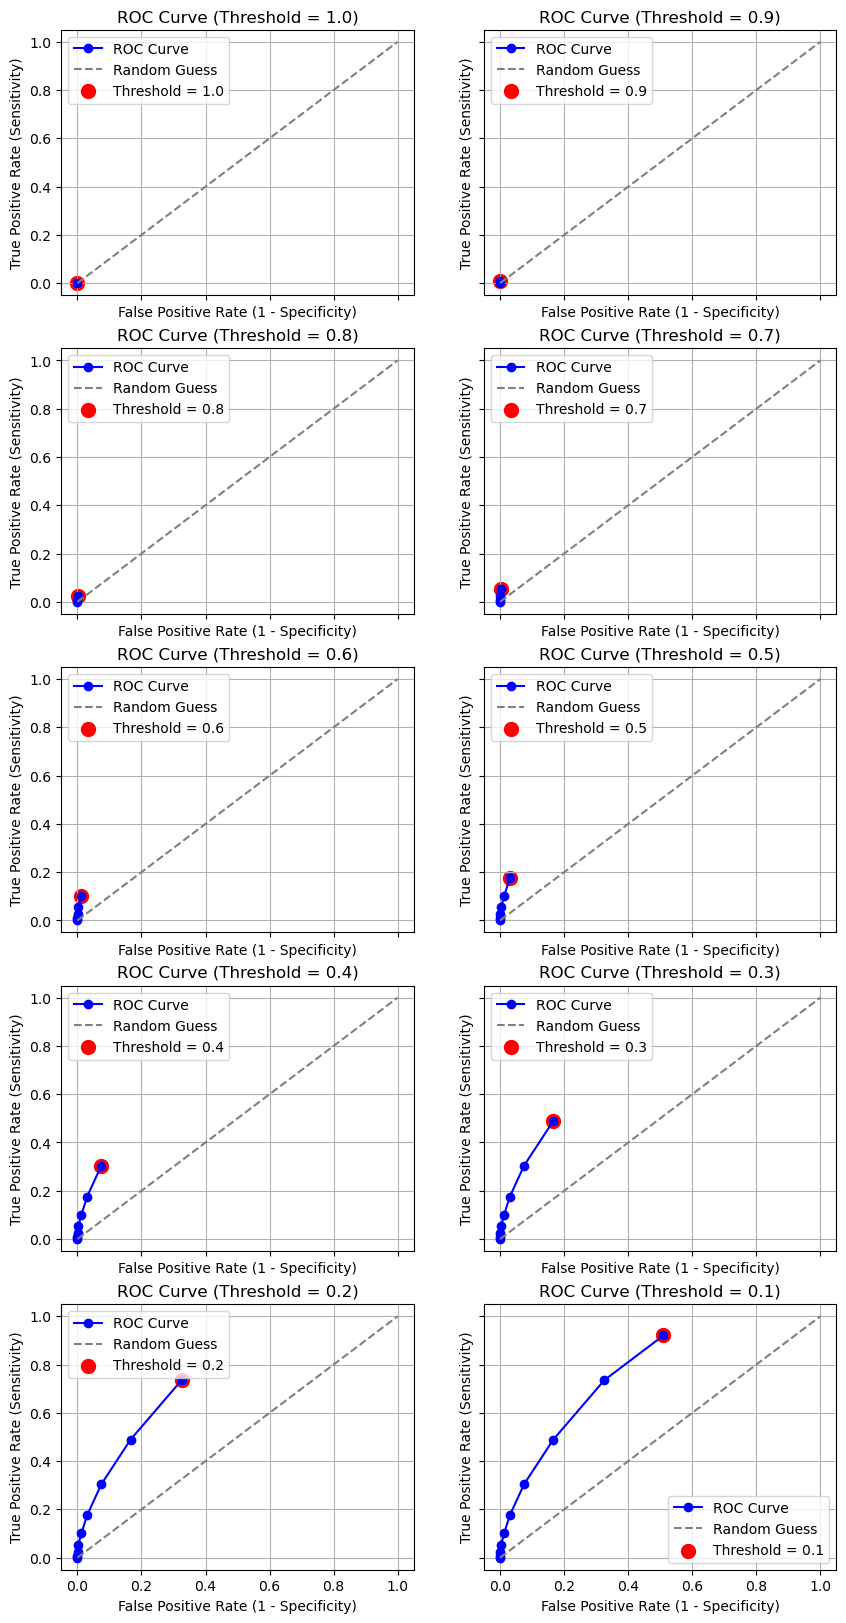

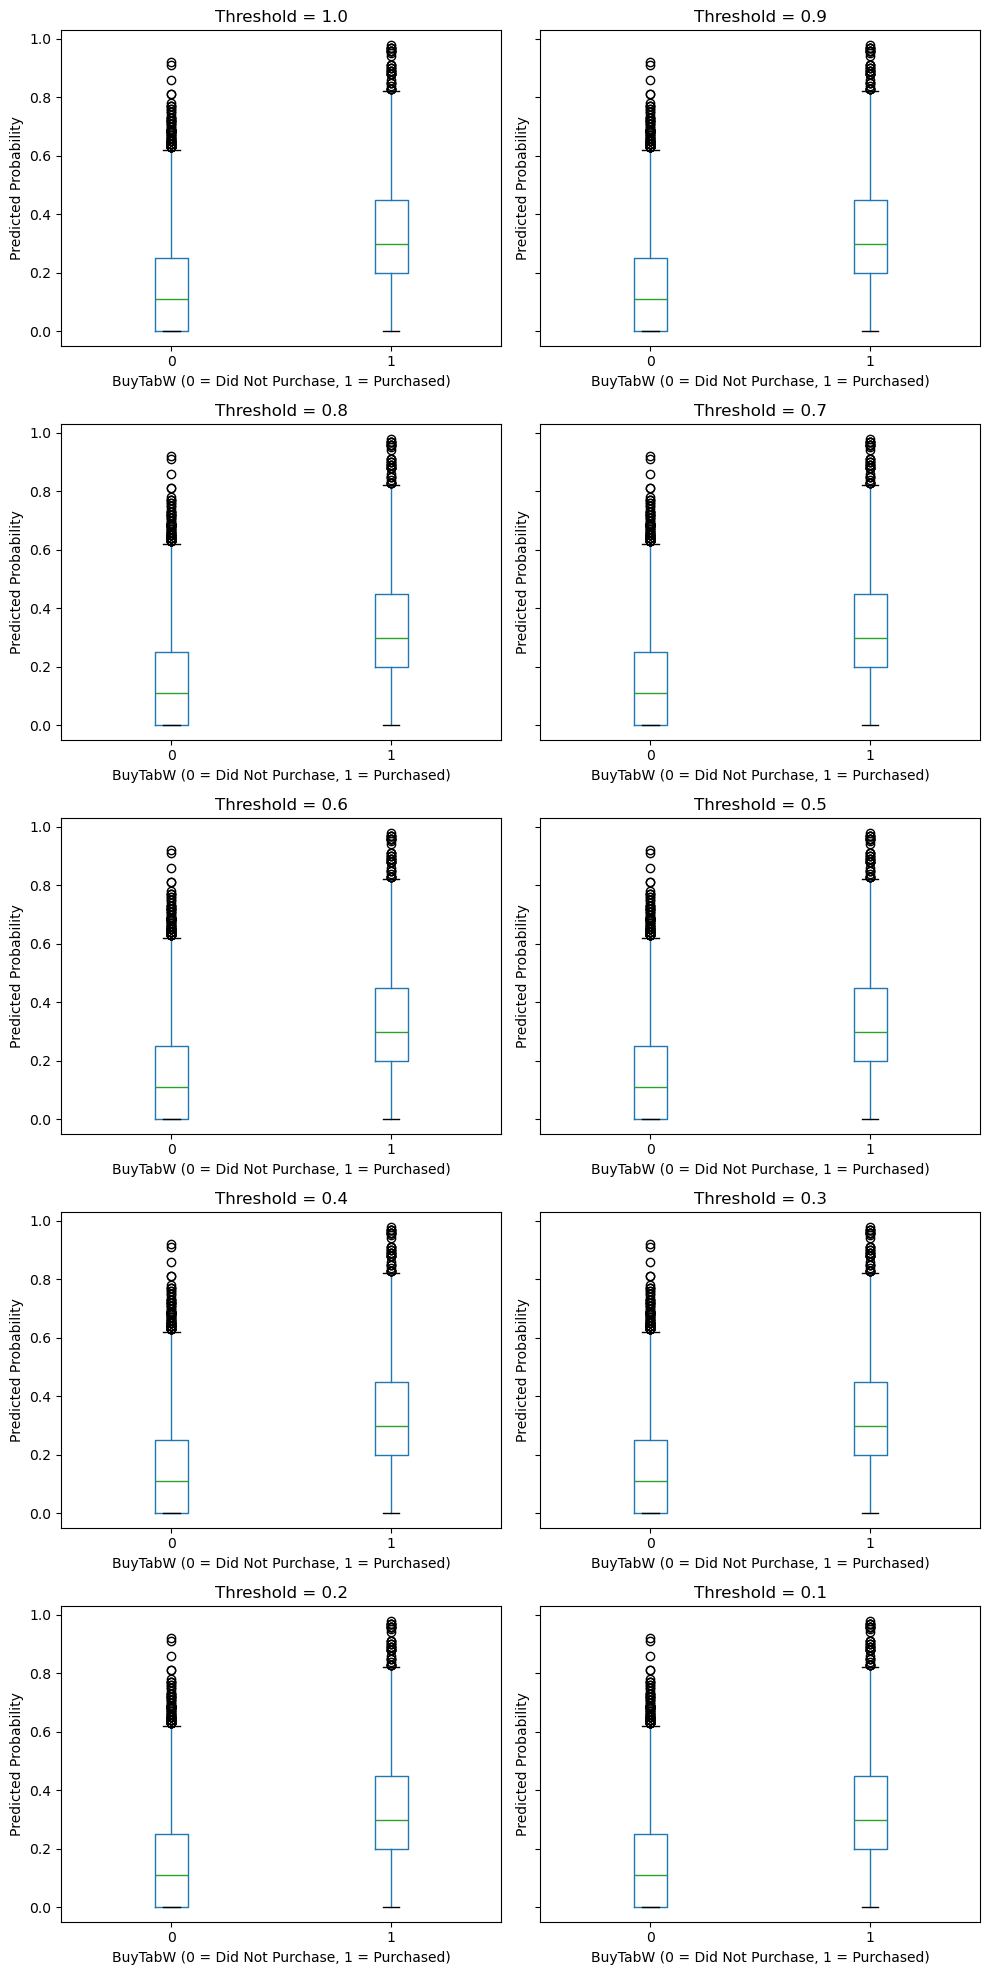

<Figure size 640x480 with 0 Axes>


AUC (Area Under the ROC Curve): 0.7875

Summary of Metrics for Different Thresholds:
   threshold   accuracy  misclassification_rate  sensitivity  specificity  \
0        1.0  82.800078               17.199922     0.000000     1.000000   
1        0.9  82.926120               17.073880     0.008455     0.999766   
2        0.8  83.187900               16.812100     0.025366     0.999415   
3        0.7  83.478767               16.521233     0.054115     0.996956   
4        0.6  83.498158               16.501842     0.101466     0.987354   
5        0.5  83.313942               16.686058     0.175310     0.969789   
6        0.4  81.849913               18.150087     0.303833     0.925410   
7        0.3  77.477215               22.522785     0.488726     0.834192   
8        0.2  68.499127               31.500873     0.735626     0.674473   
9        0.1  56.418460               43.581540     0.920519     0.490164   

   f1_score  
0  0.000000  
1  0.016750  
2  0.049342  
3  0.10126

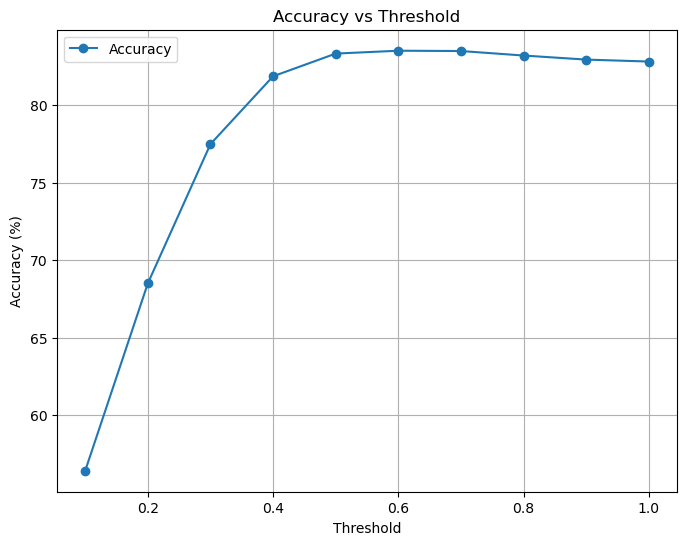


Optimal Threshold (based on minimum misclassification rate): 0.6
Misclassification rate at optimal threshold: 16.50%

Metrics at Optimal Threshold (0.6):
Classification Table (Confusion Matrix) - Random Forest:
                              Predicted: Did Not Purchase (0)  \
Actual: Did Not Purchase (0)                             8432   
Actual: Purchased (1)                                    1594   

                              Predicted: Purchased (1)  
Actual: Did Not Purchase (0)                       108  
Actual: Purchased (1)                              180  
Total observations: 10314
Correctly classified: 8612
Misclassified: 1702
Misclassification error rate: 16.5 %
Sensitivity (True Positive Rate): 0.1015
Specificity (True Negative Rate): 0.9874
Precision: 0.625
F1 Score: 0.1746

Analysis of Optimal Threshold:
1. Basis: The optimal threshold was selected based on the minimum misclassification rate.
   - A lower misclassification rate indicates better overall classificati

In [29]:
# Step 5: Verify the predicted purchase probability variable (unchanged)
print("\nSummary statistics of predicted probabilities (Random Forest):")
print(data_valid_copy['rf_pred_prob'].describe())
# Check if values are reasonable (should be between 0 and 1)
if (data_valid_copy['rf_pred_prob'] >= 0).all() and (data_valid_copy['rf_pred_prob'] <= 1).all():
    print("Predicted probabilities are within the valid range [0, 1].")
else:
    print("WARNING: Predicted probabilities contain values outside [0, 1].")

# Step 6: Loop over thresholds from 1.0 to 0.1 with a step of -0.1
thresholds = np.arange(1.0, 0.0, -0.1)  # [1.0, 0.9, ..., 0.1]

# Create a figure for boxplots (5x2 canvas)
fig_box, axes_box = plt.subplots(5, 2, figsize=(10, 20), sharey=True)  # 5 rows, 2 columns
axes_box = axes_box.flatten()  # Flatten axes for easier indexing

# Create a figure for ROC curves (5x2 canvas)
fig_roc, axes_roc = plt.subplots(5, 2, figsize=(10, 20), sharex=True, sharey=True)
axes_roc = axes_roc.flatten()  # Flatten axes for easier indexing

# Dictionary to store evaluation metrics and overlap for each threshold
metrics = {
    'threshold': [],
    'accuracy': [],
    'misclassification_rate': [],
    'sensitivity': [],
    'specificity': [],
    'f1_score': [],
    'precision': [],
    'recall': [],
    'overlap': []
}

# Lists to store ROC curve data
fpr_list = []
tpr_list = []

for idx, threshold in enumerate(thresholds):
    # Classify using the current threshold
    data_valid_copy['rf_pred_buytabw'] = (data_valid_copy['rf_pred_prob'] > threshold).astype(int)

    # Generate box plot for the current threshold on the 5x2 canvas
    ax_box = axes_box[idx]
    data_valid_copy.boxplot(column='rf_pred_prob', by='buytabw', grid=False, ax=ax_box)
    ax_box.set_title(f'Threshold = {threshold:.1f}')
    ax_box.set_xlabel('BuyTabW (0 = Did Not Purchase, 1 = Purchased)')
    ax_box.set_ylabel('Predicted Probability')
    ax_box.get_figure().suptitle('')  # Remove default suptitle

    # Calculate the overlap between boxplots for buytabw=0 and buytabw=1
    group_0 = data_valid_copy[data_valid_copy['buytabw'] == 0]['rf_pred_prob']
    group_1 = data_valid_copy[data_valid_copy['buytabw'] == 1]['rf_pred_prob']
    q1_0, q3_0 = group_0.quantile([0.25, 0.75])
    q1_1, q3_1 = group_1.quantile([0.25, 0.75])
    overlap = min(q3_0, q3_1) - max(q1_0, q1_1)

    # Calculate misclassification summary for the current threshold
    conf_matrix = confusion_matrix(data_valid_copy['buytabw'], data_valid_copy['rf_pred_buytabw'])
    total_observations = conf_matrix.sum()
    correct_predictions = np.diag(conf_matrix).sum()
    misclassifications = total_observations - correct_predictions
    accuracy = (correct_predictions / total_observations) * 100
    misclassification_rate = (misclassifications / total_observations) * 100

    # Calculate sensitivity, specificity, precision, recall, and F1 score
    true_positives = conf_matrix[1, 1]
    false_positives = conf_matrix[0, 1]
    true_negatives = conf_matrix[0, 0]
    false_negatives = conf_matrix[1, 0]
    sensitivity = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    specificity = true_negatives / (true_negatives + false_positives) if (true_negatives + false_positives) > 0 else 0
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = sensitivity
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    fpr = false_positives / (false_positives + true_negatives) if (false_positives + true_negatives) > 0 else 0

    # Store metrics
    metrics['threshold'].append(threshold)
    metrics['accuracy'].append(accuracy)
    metrics['misclassification_rate'].append(misclassification_rate)
    metrics['sensitivity'].append(sensitivity)
    metrics['specificity'].append(specificity)
    metrics['f1_score'].append(f1_score)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)
    metrics['overlap'].append(overlap)
    fpr_list.append(fpr)
    tpr_list.append(sensitivity)

    # Plot ROC curve up to the current threshold on the 5x2 canvas
    ax_roc = axes_roc[idx]
    ax_roc.plot(fpr_list[:idx+1], tpr_list[:idx+1], marker='o', label='ROC Curve', color='blue')
    ax_roc.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
    ax_roc.scatter(fpr_list[idx], tpr_list[idx], color='red', s=100, label=f'Threshold = {threshold:.1f}')
    ax_roc.set_xlabel('False Positive Rate (1 - Specificity)')
    ax_roc.set_ylabel('True Positive Rate (Sensitivity)')
    ax_roc.set_title(f'ROC Curve (Threshold = {threshold:.1f})')
    ax_roc.legend()
    ax_roc.grid(True)

# Adjust layout and save the boxplot figure
plt.figure(fig_box.number)
plt.tight_layout()
plt.savefig('rf_pred_prob_boxplots_5x2.png')
plt.show()

# Adjust layout and save the ROC curve figure
plt.figure(fig_roc.number)
plt.tight_layout()
plt.savefig('rf_roc_curves_5x2.png')
plt.show()

# Step 7: Calculate AUC using sklearn (more reliable)
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(data_valid_copy['buytabw'], data_valid_copy['rf_pred_prob'])
auc_score = auc(fpr, tpr)
print("\nAUC (Area Under the ROC Curve):", round(auc_score, 4))

# Step 8: Summarize the metrics for all thresholds
metrics_df = pd.DataFrame(metrics)
print("\nSummary of Metrics for Different Thresholds:")
print(metrics_df[['threshold', 'accuracy', 'misclassification_rate', 'sensitivity', 'specificity', 'f1_score']])

# Step 9: Plot accuracy vs threshold
plt.figure(figsize=(8, 6))
plt.plot(metrics_df['threshold'], metrics_df['accuracy'], marker='o', label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Threshold')
plt.grid(True)
plt.legend()
plt.savefig('accuracy_vs_threshold.png')
plt.show()

# Step 10: Select the optimal threshold based on minimum misclassification rate
optimal_threshold = metrics_df.loc[metrics_df['misclassification_rate'].idxmin(), 'threshold']
print(f"\nOptimal Threshold (based on minimum misclassification rate): {optimal_threshold:.1f}")
print(f"Misclassification rate at optimal threshold: {metrics_df['misclassification_rate'].min():.2f}%")

# Recompute classification and metrics at the optimal threshold
data_valid_copy['rf_pred_buytabw'] = (data_valid_copy['rf_pred_prob'] > optimal_threshold).astype(int)
conf_matrix = confusion_matrix(data_valid_copy['buytabw'], data_valid_copy['rf_pred_buytabw'])
total_observations = conf_matrix.sum()
correct_predictions = np.diag(conf_matrix).sum()
misclassifications = total_observations - correct_predictions
misclassification_rate = (misclassifications / total_observations) * 100
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]
true_negatives = conf_matrix[0, 0]
false_negatives = conf_matrix[1, 0]
sensitivity = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
specificity = true_negatives / (true_negatives + false_positives) if (true_negatives + false_positives) > 0 else 0
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = sensitivity
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print metrics at the optimal threshold
print(f"\nMetrics at Optimal Threshold ({optimal_threshold:.1f}):")
print("Classification Table (Confusion Matrix) - Random Forest:")
print(pd.DataFrame(
    conf_matrix,
    index=['Actual: Did Not Purchase (0)', 'Actual: Purchased (1)'],
    columns=['Predicted: Did Not Purchase (0)', 'Predicted: Purchased (1)']
))
print("Total observations:", total_observations)
print("Correctly classified:", correct_predictions)
print("Misclassified:", misclassifications)
print("Misclassification error rate:", round(misclassification_rate, 2), "%")
print("Sensitivity (True Positive Rate):", round(sensitivity, 4))
print("Specificity (True Negative Rate):", round(specificity, 4))
print("Precision:", round(precision, 4))
print("F1 Score:", round(f1_score, 4))

# Step 11: Analyze the results for the optimal threshold
print("\nAnalysis of Optimal Threshold:")
print("1. Basis: The optimal threshold was selected based on the minimum misclassification rate.")
print("   - A lower misclassification rate indicates better overall classification accuracy.")
print("2. Metrics: At the optimal threshold, the model achieves a balance between sensitivity and specificity.")
print("3. ROC Curve and AUC: The ROC curves show the trade-off between sensitivity and FPR across thresholds.")
print(f"   - AUC: {auc_score:.4f}. An AUC above 0.5 suggests predictive ability better than random guessing.")
print("4. Accuracy: The accuracy vs threshold plot shows how accuracy changes with the threshold.")
print("Recommendation: The optimal threshold can be used for final predictions, but you may also consider business goals:")
print("   - If identifying potential buyers (buytabw=1) is more important, you might lower the threshold slightly to increase sensitivity.")
print("   - If avoiding false positives is more important, you might increase the threshold to improve specificity.")

# 3 Score the customers

In [30]:

# Step 2: Ensure predictions DataFrame exists and contains log_pred_prob
# (This part is from your provided Logistic Regression code)
predictions = pd.DataFrame(index=data_valid.index)

In [31]:
# Load the parameters from the previous logistic regression model
try:
    with open('logistic_regression_params.pkl', 'rb') as file:
        params = pickle.load(file)
    print("Model parameters loaded successfully")
    print("Parameters:", params)
except FileNotFoundError:
    print("Error: Could not find the model parameters file 'logistic_regression_params.pkl'")
    params = None

if params is not None:
    # Get the column names from the parameters (excluding const)
    model_columns = [col for col in params.index if col != 'const']

    # Check if all required columns exist in the validation feature matrix
    missing_columns = [col for col in model_columns if col not in X_log_scaled_valid.columns]
    if missing_columns:
        print(f"WARNING: The following columns from the model are missing in the validation data: {missing_columns}")
        print("Please make sure the validation data has the same structure as the training data.")
    else:
        # Calculate the linear predictor (z), minimizing new variables
        z = np.zeros(len(X_log_scaled_valid))
        for col in model_columns:
            if col in X_log_scaled_valid.columns:
                z += params[col] * X_log_scaled_valid[col]

        # Calculate the predicted probability using the logistic function
        log_pred_prob = 1 / (1 + np.exp(-z))

        # Store predicted probabilities in the new DataFrame
        predictions['log_pred_prob'] = log_pred_prob

        print("\nSummary statistics of predicted probabilities (Logistic Regression):")
        print(predictions['log_pred_prob'].describe())

Model parameters loaded successfully
Parameters: tabordrs     0.289398
divwords     0.629771
spgtabord    0.178552
moslsdvw    -0.107748
moslstab    -0.096859
orders      -0.346522
dtype: float64

Summary statistics of predicted probabilities (Logistic Regression):
count    10314.000000
mean         0.490715
std          0.165071
min          0.118884
25%          0.366214
50%          0.462110
75%          0.582150
max          0.999973
Name: log_pred_prob, dtype: float64


In [32]:
# Step 3: Add the predicted probabilities to data_valid_copy
# Logistic Regression predictions
if 'log_pred_prob' in predictions.columns:
    data_valid_copy['log_pred_prob'] = predictions['log_pred_prob']
else:
    print("Error: Logistic Regression predictions ('log_pred_prob') not found.")
    data_valid_copy['log_pred_prob'] = np.nan  # Placeholder to avoid breaking the code

# Random Forest predictions (assuming rf_pred_prob is already in data_valid_copy from previous steps)
# If not, you need to run the Random Forest prediction code first

In [33]:
# Step 4: Define the function to create score segments (based on the image)
def create_score_segments(df, prob_col):
    # Make a copy to avoid modifying the original
    temp_df = df.copy()
    
    # Sort by predicted probability in ascending order (lowest first)
    temp_df = temp_df.sort_values(by=prob_col, ascending=True)
    
    # Create decile segments (scores from 10 to 1, where 10 is highest)
    num_rows = len(temp_df)
    decile_size = num_rows // 10  # Integer division to get size of each decile
    
    # Assign scores
    scores = []
    for i in range(10):
        if i < 9:  # First 9 deciles
            scores.extend([10 - i] * decile_size)
        else:  # Last decile may have slightly more elements due to division remainder
            scores.extend([1] * (num_rows - len(scores)))
    
    temp_df['score'] = scores
    return temp_df

# Step 5: Define the function to create summary statistics by segment (based on the image)
def create_score_summary(bank_valid_scored):
    # Group by score and calculate statistics
    summary = bank_valid_scored.groupby('score').agg(
        n_obs=('buytabw', 'count'),  # Number of observations in segment
        n_clients=('buytabw', 'sum'),  # Number of buyers (buytabw == 1)
        mean_pred_prob=('pred_prob', 'mean'),  # Mean predicted purchase probability
        mean_observed_client=('buytabw', 'mean')  # Mean observed purchase rate
    ).reset_index()
    
    # Sort by descending score (10 to 1)
    summary = summary.sort_values(by='score', ascending=False)
    return summary

In [34]:
# Step 6: Process Logistic Regression model
# Create score segments for Logistic Regression
data_valid_copy_logistic = create_score_segments(data_valid_copy, 'log_pred_prob')
# Temporarily rename the column for summary function compatibility
data_valid_copy_logistic['pred_prob'] = data_valid_copy_logistic['log_pred_prob']

# Create summary data frame for Logistic Regression
score_DF_logistic = create_score_summary(data_valid_copy_logistic)

# Print the summary for Logistic Regression
print("\nSummary Statistics by Decile Segment (Logistic Regression):")
print(score_DF_logistic)


Summary Statistics by Decile Segment (Logistic Regression):
   score  n_obs  n_clients  mean_pred_prob  mean_observed_client
9     10   1031          0        0.263148              0.000000
8      9   1031          2        0.328171              0.001940
7      8   1031         24        0.366289              0.023278
6      7   1031         73        0.409084              0.070805
5      6   1031        130        0.445703              0.126091
4      5   1031        200        0.481442              0.193986
3      4   1031        208        0.524486              0.201746
2      3   1031        267        0.582609              0.258972
1      2   1031        342        0.668535              0.331717
0      1   1035        528        0.836346              0.510145


In [35]:
# Step 7: Process Random Forest model
# Create score segments for Random Forest
data_valid_copy_rf = create_score_segments(data_valid_copy, 'rf_pred_prob')
# Temporarily rename the column for summary function compatibility
data_valid_copy_rf['pred_prob'] = data_valid_copy_rf['rf_pred_prob']

# Create summary data frame for Random Forest
score_DF_rf = create_score_summary(data_valid_copy_rf)

# Print the summary for Random Forest
print("\nSummary Statistics by Decile Segment (Random Forest):")
print(score_DF_rf)


Summary Statistics by Decile Segment (Random Forest):
   score  n_obs  n_clients  mean_pred_prob  mean_observed_client
9     10   1031          4        0.000000              0.003880
8      9   1031          3        0.000000              0.002910
7      8   1031         16        0.013099              0.015519
6      7   1031         87        0.060884              0.084384
5      6   1031        162        0.121834              0.157129
4      5   1031        187        0.177865              0.181377
3      4   1031        226        0.229679              0.219205
2      3   1031        289        0.286605              0.280310
1      2   1031        305        0.366666              0.295829
0      1   1035        495        0.553374              0.478261


# 4. Lift and gains

In [36]:
# Step 1: Define the function to calculate lift metrics (based on the image)
def calculate_lift_metrics(summary_df):
    # Make a copy to avoid modifying the original
    df = summary_df.copy()
    
    # Calculate total observations and clients
    total_obs = df['n_obs'].sum()
    total_clients = df['n_clients'].sum()
    
    # Overall client rate (baseline rate)
    overall_rate = total_clients / total_obs
    
    # Calculate lift (how much better than random selection)
    df['lift'] = df['mean_observed_client'] / overall_rate
    
    # Calculate cumulative values (already sorted by descending score)
    df['cum_obs'] = df['n_obs'].cumsum()
    df['cum_clients'] = df['n_clients'].cumsum()
    
    # Calculate cumulative lift and gains
    df['cum_lift'] = df['cum_clients'] / df['cum_obs'] / overall_rate
    df['cum_gains'] = df['cum_clients'] / total_clients * 100  # As percentage
    
    # Calculate percentage of population
    df['pct_population'] = df['cum_obs'] / total_obs * 100
    
    return df

In [37]:
# Step 2: Calculate lift metrics for Logistic Regression and Random Forest
lift_DF_logistic = calculate_lift_metrics(score_DF_logistic)
lift_DF_rf = calculate_lift_metrics(score_DF_rf)

In [38]:
# Step 3: Print the lift metrics tables
print("\nLift Metrics Table (Logistic Regression):")
print(lift_DF_logistic[['score', 'lift', 'cum_lift', 'cum_gains', 'pct_population']])

print("\nLift Metrics Table (Random Forest):")
print(lift_DF_rf[['score', 'lift', 'cum_lift', 'cum_gains', 'pct_population']])


Lift Metrics Table (Logistic Regression):
   score      lift  cum_lift   cum_gains  pct_population
9     10  0.000000  0.000000    0.000000        9.996122
8      9  0.011278  0.005639    0.112740       19.992244
7      8  0.135340  0.048873    1.465614       29.988365
6      7  0.411659  0.139569    5.580609       39.984487
5      6  0.733092  0.258274   12.908681       49.980609
4      5  1.127833  0.403200   24.182638       59.976731
3      4  1.172946  0.513164   35.907554       69.972852
2      3  1.505657  0.637226   50.958286       79.968974
1      2  1.928595  0.780711   70.236753       89.965096
0      1  2.965972  1.000000  100.000000      100.000000

Lift Metrics Table (Random Forest):
   score      lift  cum_lift   cum_gains  pct_population
9     10  0.022557  0.022557    0.225479        9.996122
8      9  0.016917  0.019737    0.394589       19.992244
7      8  0.090227  0.043234    1.296505       29.988365
6      7  0.490607  0.155077    6.200676       39.984487
5      6

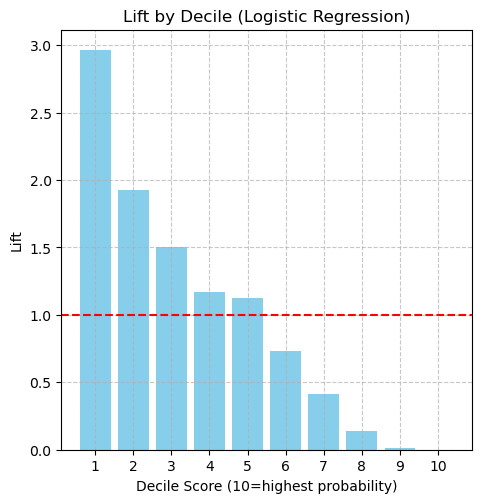

In [39]:
# Step 4: Plotting the charts and save as PNG
plt.figure(figsize=(18, 12))

# Plot 1: Lift Chart (Logistic Regression)
plt.subplot(2, 3, 1)
plt.bar(lift_DF_logistic['score'], lift_DF_logistic['lift'], color='skyblue')
plt.axhline(y=1, color='r', linestyle='--')
plt.title('Lift by Decile (Logistic Regression)')
plt.xlabel('Decile Score (10=highest probability)')
plt.ylabel('Lift')
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.7)

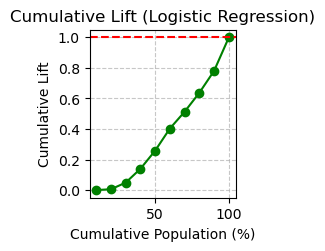

In [40]:
# Plot 2: Cumulative Lift Chart (Logistic Regression)
plt.subplot(2, 3, 2)
plt.plot(lift_DF_logistic['pct_population'], lift_DF_logistic['cum_lift'], marker='o', color='green')
plt.axhline(y=1, color='r', linestyle='--')
plt.title('Cumulative Lift (Logistic Regression)')
plt.xlabel('Cumulative Population (%)')
plt.ylabel('Cumulative Lift')
plt.grid(True, linestyle='--', alpha=0.7)

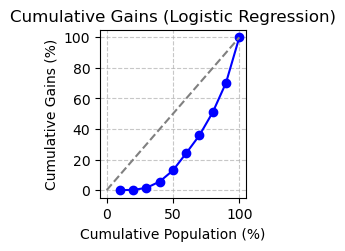

In [41]:
# Plot 3: Cumulative Gains Chart (Logistic Regression)
plt.subplot(2, 3, 3)
plt.plot(lift_DF_logistic['pct_population'], lift_DF_logistic['cum_gains'], marker='o', color='blue')
plt.plot([0, 100], [0, 100], linestyle='--', color='gray')  # Diagonal reference line
plt.title('Cumulative Gains (Logistic Regression)')
plt.xlabel('Cumulative Population (%)')
plt.ylabel('Cumulative Gains (%)')
plt.grid(True, linestyle='--', alpha=0.7)

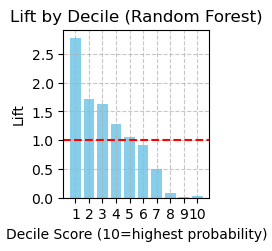

In [42]:
# Plot 4: Lift Chart (Random Forest)
plt.subplot(2, 3, 4)
plt.bar(lift_DF_rf['score'], lift_DF_rf['lift'], color='skyblue')
plt.axhline(y=1, color='r', linestyle='--')
plt.title('Lift by Decile (Random Forest)')
plt.xlabel('Decile Score (10=highest probability)')
plt.ylabel('Lift')
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.7)

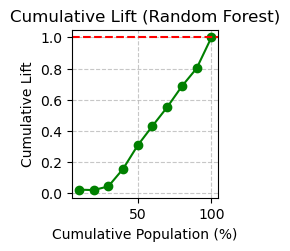

In [43]:
# Plot 5: Cumulative Lift Chart (Random Forest)
plt.subplot(2, 3, 5)
plt.plot(lift_DF_rf['pct_population'], lift_DF_rf['cum_lift'], marker='o', color='green')
plt.axhline(y=1, color='r', linestyle='--')
plt.title('Cumulative Lift (Random Forest)')
plt.xlabel('Cumulative Population (%)')
plt.ylabel('Cumulative Lift')
plt.grid(True, linestyle='--', alpha=0.7)

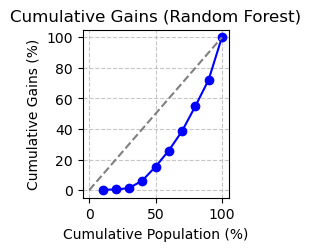

In [44]:
# Plot 6: Cumulative Gains Chart (Random Forest)
plt.subplot(2, 3, 6)
plt.plot(lift_DF_rf['pct_population'], lift_DF_rf['cum_gains'], marker='o', color='blue')
plt.plot([0, 100], [0, 100], linestyle='--', color='gray')  # Diagonal reference line
plt.title('Cumulative Gains (Random Forest)')
plt.xlabel('Cumulative Population (%)')
plt.ylabel('Cumulative Gains (%)')
plt.grid(True, linestyle='--', alpha=0.7)

In [45]:
# Adjust layout and save the figure as PNG
plt.tight_layout()
plt.savefig('lift_and_gains_charts.png', format='png', dpi=300)  # Save as PNG with high resolution
plt.show()

<Figure size 640x480 with 0 Axes>

# 5 Profitability analysis

In [46]:
# Step 1: Define constants (based on the problem)
MARGIN_PER_CLIENT = 27.90  # Average dollar margin per client
ACQUISITION_COST = 2.20    # Cost of printing and mailing one tabloid

# Step 2: Calculate expected profits for Logistic Regression and Random Forest
# Ensure data_valid_copy has the predicted probabilities
data_valid_copy['expected_profit_logistic'] = (data_valid_copy['log_pred_prob'] * MARGIN_PER_CLIENT) - ACQUISITION_COST
data_valid_copy['expected_profit_rf'] = (data_valid_copy['rf_pred_prob'] * MARGIN_PER_CLIENT) - ACQUISITION_COST

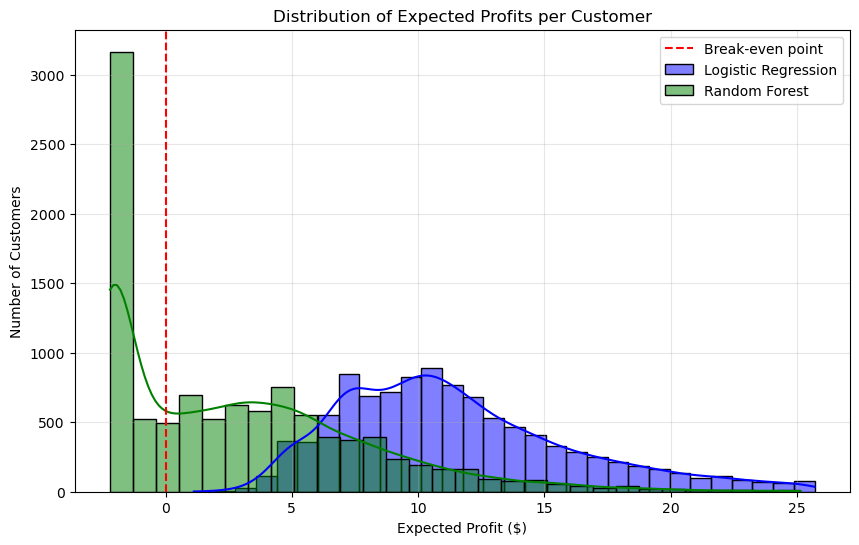

In [47]:
# Step 3: Plot histogram of expected profits and save as PNG
plt.figure(figsize=(10, 6))
# Histogram for Logistic Regression
sns.histplot(data_valid_copy['expected_profit_logistic'], bins=30, kde=True, color='blue', alpha=0.5, label='Logistic Regression')
# Histogram for Random Forest
sns.histplot(data_valid_copy['expected_profit_rf'], bins=30, kde=True, color='green', alpha=0.5, label='Random Forest')
plt.axvline(x=0, color='red', linestyle='--', label='Break-even point')
plt.xlabel('Expected Profit ($)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Expected Profits per Customer')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('expected_profits_histogram.png', format='png', dpi=300)
plt.show()

In [48]:
# Step 4: Calculate the fraction of customers with positive expected profits
fraction_profitable_logistic = (data_valid_copy['expected_profit_logistic'] > 0).mean()
fraction_profitable_rf = (data_valid_copy['expected_profit_rf'] > 0).mean()

print(f"\nFraction of customers with positive expected profits (Logistic Regression): {fraction_profitable_logistic:.2%}")
print(f"Fraction of customers with positive expected profits (Random Forest): {fraction_profitable_rf:.2%}")


Fraction of customers with positive expected profits (Logistic Regression): 100.00%
Fraction of customers with positive expected profits (Random Forest): 62.82%


In [49]:
# Step 5: Calculate realized profits based on actual client value (buytabw)
data_valid_copy['realized_profit'] = np.where(data_valid_copy['buytabw'] == 1, MARGIN_PER_CLIENT, 0) - ACQUISITION_COST

In [50]:
# Step 6: Create cumulative profit curves for both models
# Logistic Regression
df_sorted_logistic = data_valid_copy.sort_values(by='expected_profit_logistic', ascending=False).copy()
df_sorted_logistic['cum_realized_profit'] = df_sorted_logistic['realized_profit'].cumsum()
total_customers = len(df_sorted_logistic)
df_sorted_logistic['pct_customers'] = (np.arange(total_customers) + 1) / total_customers * 100
# Random Forest
df_sorted_rf = data_valid_copy.sort_values(by='expected_profit_rf', ascending=False).copy()
df_sorted_rf['cum_realized_profit'] = df_sorted_rf['realized_profit'].cumsum()
df_sorted_rf['pct_customers'] = (np.arange(total_customers) + 1) / total_customers * 100

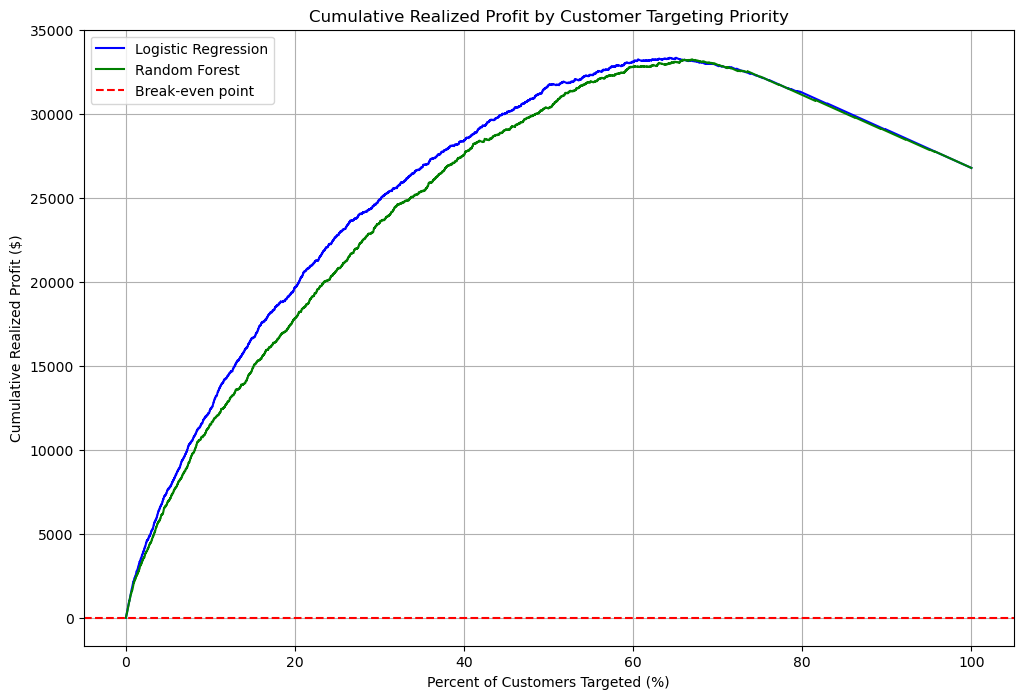

In [51]:
# Step 7: Plot cumulative realized profits and save as PNG
plt.figure(figsize=(12, 8))
# Logistic Regression
plt.plot(df_sorted_logistic['pct_customers'], df_sorted_logistic['cum_realized_profit'], color='blue', label='Logistic Regression')
# Random Forest
plt.plot(df_sorted_rf['pct_customers'], df_sorted_rf['cum_realized_profit'], color='green', label='Random Forest')
plt.axhline(y=0, color='red', linestyle='--', label='Break-even point')
plt.xlabel('Percent of Customers Targeted (%)')
plt.ylabel('Cumulative Realized Profit ($)')
plt.title('Cumulative Realized Profit by Customer Targeting Priority')
plt.grid(True)
plt.legend()
plt.savefig('cumulative_realized_profits.png', format='png', dpi=300)
plt.show()